One or both of the dates 2023-02-19 and 2023-02-28 do not exist in the DataFrame's index.
All required columns are present.


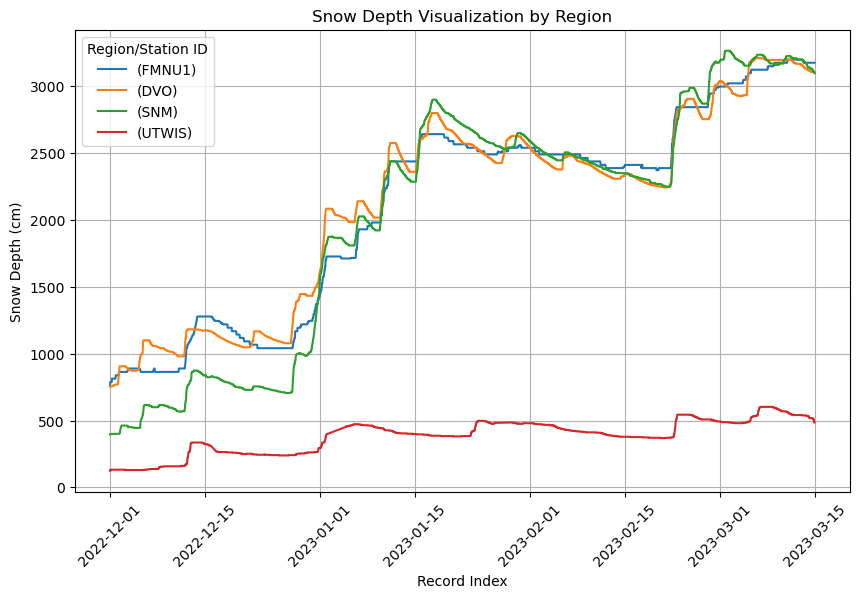

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from postprocessing.filter_funcs import filter_all_stations
from utils.lookups import kernel_lookup

kernel_stids = kernel_lookup.keys()

# High elevation stations
stids_high = ["FMNU1", "DVO", "SNM","UTWIS"]
# Low elevation stations
stids_low = ["TPR", "LPTUT", "COOPPLTU1", "COOPJENU1"]

# Define file path for HDF5 file
dfsub_file_path = '/Users/michaeldavies/PycharmProjects/snowshadow/data/df_obs_2023pp.h5'

# Load the full DataFrame from the HDF5 file
df = pd.read_hdf(dfsub_file_path)

df = df[df['stid'].isin(kernel_stids)]

df = filter_all_stations(df, "snow_depth", filt_method="max_median")


# Define the complete date range you're interested in
date_range = pd.date_range(start='2023-02-19', end='2023-02-28')


# Check if the dates exist in the index
start_str = '2023-02-19'
end_str = '2023-02-28'
if pd.to_datetime(start_str) in df.index and pd.to_datetime(end_str) in df.index:
    df = df.loc[start_str:end_str]
else:
    print(f"One or both of the dates {start_str} and {end_str} do not exist in the DataFrame's index.")



# Check if the required columns are present
if df is not None:
    required_columns = {'stid', 'snow_depth'}
    missing_columns = required_columns - set(df.columns)
    if missing_columns:
        print(f"Error: Missing columns {missing_columns} in the DataFrame. Please check the file structure.")
    else:
        print("All required columns are present.")
        # Update colormap access to be compliant with Matplotlib 3.7+
        cmap = plt.get_cmap('hsv')
        plt.figure(figsize=(10, 6))

        # Filter and plot data for each region specified in the dictionary
        for stid in stids_high:
            stid_data = df[df['stid'] == stid]
            if not stid_data.empty:
                plt.plot(
                    stid_data.index,  
                    stid_data['snow_depth_filtered'],  # Snow depth values as y-axis
                    label=f"({stid})",  # Station ID as label
                )
            else:
                print(f"No data available for station ID: {stid}")

        plt.title('Snow Depth Visualization by Region')
        plt.xlabel('Record Index')
        plt.xticks(rotation=45)
        plt.ylabel('Snow Depth (cm)')
        plt.grid(True)
        plt.legend(title="Region/Station ID")
        plt.show()
else:
    print("DataFrame is not loaded, skipping plotting.")